In [1]:
import requests
import json
import networkx as nx
from IPython.display import Image

# Library for util
from py2cytoscape import util as cy 

from collections import OrderedDict
import numpy as np
from bokeh.charts import Bar
from bokeh.plotting import *

output_notebook()

import pandas as pd

# Basic Setup
PORT_NUMBER = 1234

#IP = '192.168.1.1'
IP = 'localhost'

BASE = 'http://' + IP + ':' + str(PORT_NUMBER) + '/v1/'

# Header for posting data to the server as JSON
HEADERS = {'Content-Type': 'application/json'}

# Delete all networks in current session
requests.delete(BASE + 'session')

/usr/local/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


Loading BokehJS ...

<Response [200]>

Number of Nodes = 3
Number of Edges = 4


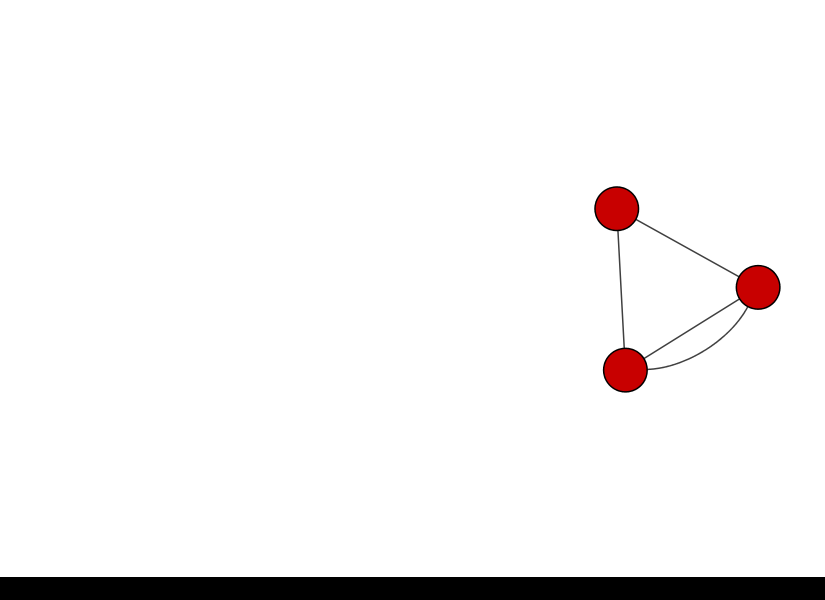

In [2]:
#Make empty graph
g = nx.MultiDiGraph()

#Add nodes
g.add_node(1)
g.add_node(2)
g.add_node(3)

#Add edges
g.add_edge(1, 2)
g.add_edge(2, 1)
g.add_edge(1, 3)
g.add_edge(3, 2)

#Print number of nodes and edges
print('Number of Nodes = ' + str(g.number_of_nodes()))
print('Number of Edges = ' + str(g.number_of_edges()))

# Convert NetworkX Graph object 
cytoscape_network = cy.from_networkx(g)

res1 = requests.post(BASE + 'networks', data=json.dumps(cytoscape_network), headers=HEADERS)
res1_dict = res1.json()
new_suid = res1_dict['networkSUID']
requests.get(BASE + 'apply/layouts/force-directed/' + str(new_suid))
Image(BASE+'networks/' + str(new_suid) + '/views/first.png')

34
78


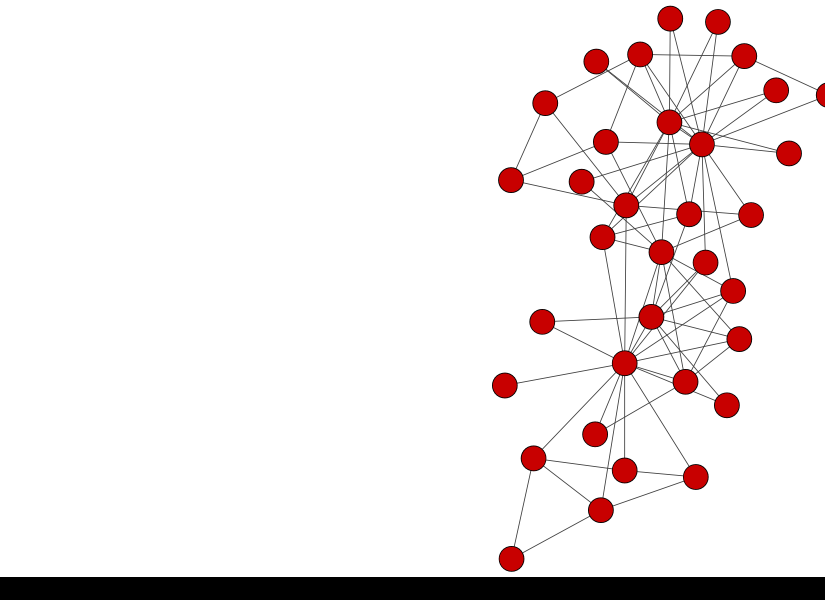

In [14]:
scale_free_graph = nx.karate_club_graph()
scale_free_graph.graph['name'] = 'Scale-Free Graph'

print(scale_free_graph.number_of_nodes())
print(scale_free_graph.number_of_edges())

res1 = requests.post(BASE + 'networks', data=json.dumps(cy.from_networkx(scale_free_graph)), headers=HEADERS)
res1_dict = res1.json()
new_suid = res1_dict['networkSUID']
requests.get(BASE + 'apply/layouts/force-directed/' + str(new_suid))
Image(BASE+'networks/' + str(new_suid) + '/views/first.png')